#**Tomato Plant Disease Image Classification**

#### Brandon Ritchie Yang

### **Overview & Problem**

Tomatoes is one of the most widely consumed foods globally, can be enjoyed in various culinary preparations. From fresh salads to sauces and juices, tomatoes offer a versatile and delicious addition to meals. Their popularity comes from their rich flavor, nutritional value, and ease of cultivation.

However, tomato plants are vulnerable to various diseases that can significantly impact their yield and quality. Common diseases include blight, mold, and mosaic virus. These diseases can cause stunted growth, reduced fruit production, and even plant death. When tomato plants are affected by diseases, farmers may experience financial losses due to decreased yields.

Therefore, it is crucial to implement effective disease management strategies to protect tomato plants and ensure a consistent supply of this nutritious fruit.

### **Goals**

This project aims to predict the type of tomato plant disease based on an image. The goal is to build a model to identifies which type of disease is the tomato plants having, enabling tomato farmers to take action based on the disease that the plants have to increase the quality of the tomatoes and minimize the probability that the plant can get the disease, so farmers can produce their tomatoes with the best quality and sell with a higher price.

### **Project Workflow**
1. **Data Collection**: Importing the dataset and understanding its structure.
2. **Data Preprocessing**: Resizing, normalizing data and perform data augmentation.
3. **Model Building**: Developing deep learning model (CNN).
4. **Model Evaluation**: Assessing the performance of the model using evaluation metrics.
5. **Model Saving**: Saving model for model deployment.
6. **Conclusion**: Summarizing the findings and potential business impacts.




# Data Collection

In [ ]:
# Data is uploaded to google drive and will be read from the google drive.
import zipfile
import os

# unzip and extract data
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Tomato_Disease_Image.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# import libraries needed

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import models, layers

In [ ]:
# read image by batch

img_size = 256
batch_size = 32

data = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Tomato_Disease_Image',
    shuffle = True,
    image_size = (img_size, img_size),
    batch_size = batch_size
)

Found 16011 files belonging to 10 classes.


# Data Preprocessing

In [ ]:
# view image class name

class_names = data.class_names
print(class_names)

['Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


There are a total of 10 different disease classes including the healthy plant.

In [ ]:
# view total number of image

len(data)

501

The total number of the image is 501 images.

In [ ]:
# see the shape of the image and the labels from first batch

for image_batch, labels_batch in data.take(1):
  print(image_batch.shape)
  print(labels_batch.numpy())

(32, 256, 256, 3)
[8 0 4 7 9 0 3 7 6 5 1 2 7 3 3 5 7 4 5 4 7 2 2 5 0 7 0 7 4 0 1 6]


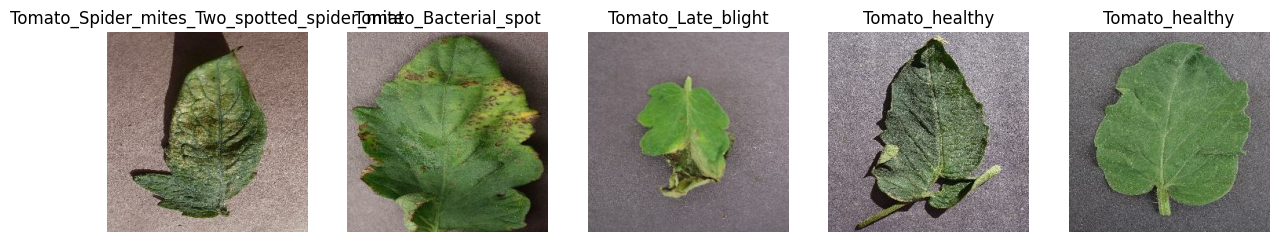

In [ ]:
# view some image and their label from first batch

plt.figure(figsize = (15, 10))
for image_batch, labels_batch in data.take(1):
  for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')

In [ ]:
# normalize and resize image

def normalize_img(image, label):
    image = tf.image.resize(image, [img_size, img_size])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

data = data.map(normalize_img)



1.   **Resizing**: This ensures all images have the same dimensions as input for your model. This can be important because models typically expect a specific input size. Resizing ensures consistent input for all images. Beside that, resizing allows the model to work more efficiently.
2.   **Normalization**: Images typically have pixel values ranging from 0 to 255. Normalization scales these values to a common range, typically between 0 and 1. Normalization often leads to better model performance and faster training by centering the data distribution.



In [ ]:
# make sure images are resized and normalized (pixel value start from 0 to 1 and image size is 256 by 256 by 3)

for image_batch, labels_batch in data.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    print("Min pixel value:", tf.reduce_min(image_batch).numpy())
    print("Max pixel value:", tf.reduce_max(image_batch).numpy())

(32, 256, 256, 3)
[9 6 9 7 3 4 5 5 3 5 0 1 7 7 5 2 0 7 6 0 7 5 0 1 4 7 7 7 3 1 9 4]
Min pixel value: 0.0
Max pixel value: 1.0


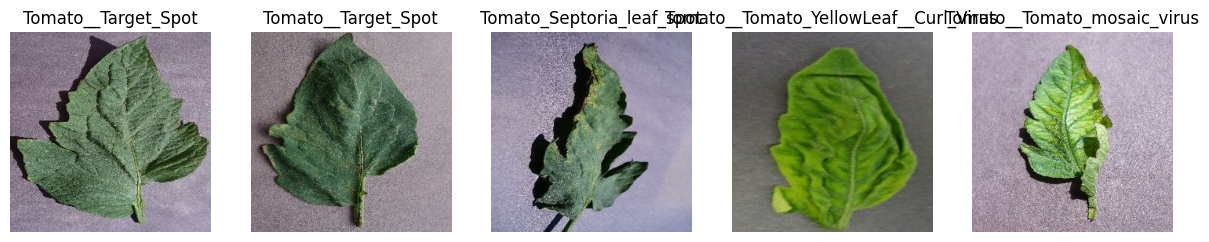

In [ ]:
plt.figure(figsize = (15, 10))
for image_batch, labels_batch in data.take(1):
  for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(image_batch[i].numpy())
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')

In [ ]:
# split data to 80% train, 10% validation, 10% test

dataset_size = len(data)
train_size = int(0.8 * dataset_size)
val_size = int(0.1 * dataset_size)
test_size = int(0.1 * dataset_size)

train_data = data.take(train_size)
val_test_data = data.skip(train_size)
val_data = val_test_data.take(val_size)
test_data = val_test_data.skip(val_size)

print(f'Total dataset size: {dataset_size}')
print(f'Training dataset size: {train_size}')
print(f'Validation dataset size: {val_size}')
print(f'Testing dataset size: {test_size}')

Total dataset size: 501
Training dataset size: 400
Validation dataset size: 50
Testing dataset size: 50


In [ ]:
# since the data splitting left 1 image so the last image is inputed to the validation data

dataset_size = len(data)
train_size = 400
val_size = 51
test_size = 50

train_data = data.take(train_size)
val_test_data = data.skip(train_size)
val_data = val_test_data.take(val_size)
test_data = val_test_data.skip(val_size)

print(f'Total dataset size: {dataset_size}')
print(f'Training dataset size: {train_size}')
print(f'Validation dataset size: {val_size}')
print(f'Testing dataset size: {test_size}')

Total dataset size: 501
Training dataset size: 400
Validation dataset size: 51
Testing dataset size: 50


In [ ]:
# cache, shuffle and prefetch data

train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_data.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)



1.   Caching: Caching the data in memory can significantly speed up the training process, especially if the dataset fits into memory. This eliminates the need to read the data from disk multiple times.
2.   Shuffling: Shuffling is crucial for training and validation to ensure that the model does not learn the order of the data. It also helps in generalizing the model better.
3.   Prefetching: Prefetching allows the data loading and model execution to overlap, which can improve the throughput of the training process by reducing the idle time of the GPU/CPU.



In [ ]:
# perform data augmentation

data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

**Data augmentation** is a technique used to artificially increase the size and diversity of a dataset by applying various transformations to existing images. This is particularly useful when dealing with limited amounts of data. By applying appropriate data augmentation techniques the performance and generalization ability of the model can improve.

**Data Augmentation performed**:


1.   **Random Flip**: Randomly flips the image horizontally and vertically. This helps the model become more invariant to the orientation of objects in the images.
2.   **Random Rotation**: Randomly rotates the image by an angle between -20 degrees and 20 degrees. This helps the model become more invariant to the rotation of objects in the images.



# Model Building

In [ ]:
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (img_size, img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

model.build(input_shape = (None, img_size, img_size, 3))

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)       

The model use in this project is the Convolutional Neural Network (CNN) model for classifying images with data augmentation performed in the begining to increase the size of the dataset with flipping and rotating the image.

Next is the convolutional layers. The layer applies 32 filters of size 3x3 to the input image. Each filter learns to detect specific features in the image. The "relu" activation function introduces non-linearity, allowing the model to learn complex patterns.

For each convolutional layers there will be maxpooling layer. This layer downsamples the feature maps by taking the maximum value within a 2x2 window. This reduces the spatial dimensions of the data while retaining the most important features.

The model continues with several more convolutional and max-pooling layers, progressively increasing the number of filters from 32 to 64 to 128 (each number with 2 layers) to extract more complex features.

After the final convolutional layers, the flattening layer occurs. It transforms the multi dimensional feature maps into a one dimensional vector. This allows the model to connect the extracted features to the final classification layers.

Next is the fully connected layer, this layer has 128 neurons and uses the relu activation function. It learns to map the flattened features to higher-level representations relevant for classification.

The final layer has 10 neurons (10 different disease classes) and uses the softmax activation function. Softmax outputs a probability distribution for each class, indicating the likelihood of an image belonging to each disease category.

Lastly, the model is compiled with the Adam optimizer for efficient training with the loss function used is Sparse Categorical Crossentropy which is suitable for multi-class classification with categorical labels, and the accuracy metric is used to track the model performance during training and evaluation.

In [ ]:
history = model.fit(
    train_ds,
    epochs = 15,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/15
400/400 [==============================] - 164s 407ms/step - loss: 1.6064 - accuracy: 0.4314 - val_loss: 1.0165 - val_accuracy: 0.6550
Epoch 2/15
400/400 [==============================] - 162s 404ms/step - loss: 0.9423 - accuracy: 0.6733 - val_loss: 1.2453 - val_accuracy: 0.6023
Epoch 3/15
400/400 [==============================] - 161s 401ms/step - loss: 0.6761 - accuracy: 0.7594 - val_loss: 1.9744 - val_accuracy: 0.4975
Epoch 4/15
400/400 [==============================] - 160s 401ms/step - loss: 0.5222 - accuracy: 0.8169 - val_loss: 0.7354 - val_accuracy: 0.7684
Epoch 5/15
400/400 [==============================] - 161s 403ms/step - loss: 0.4588 - accuracy: 0.8367 - val_loss: 0.5562 - val_accuracy: 0.8058
Epoch 6/15
400/400 [==============================] - 161s 402ms/step - loss: 0.3841 - accuracy: 0.8624 - val_loss: 0.5289 - val_accuracy: 0.8290
Epoch 7/15
400/400 [==============================] - 161s 403ms/step - loss: 0.3538 - accuracy: 0.8739 - val_loss: 0.4824 -

The model is trained by iterating through the training dataset in 32 batches for 15 epochs. It also monitors the performance on the validation dataset evaluate how well the model generalizes to unseen data.

The accuracy obtain in the final epoch is 93.82% and the validation accuracy is 85.11%

# Model Evaluation

In [ ]:
model.evaluate(test_ds)

50/50 [==============================] - 5s 78ms/step - loss: 0.5614 - accuracy: 0.8638


[0.5613641142845154, 0.8638378977775574]

After the model is evaluated using the test dataset, the accuracy obtained is 86.38% where this accuracy is nearer to the validation accuracy. There are a slight difference from the training accuracy and the validation/test accuracy which has a gap around 7% to 8% of accuracy difference. This indicates that the model might be a little overfitting because the model is struggle and performed not as good as the training data in the validation and testing dataset.

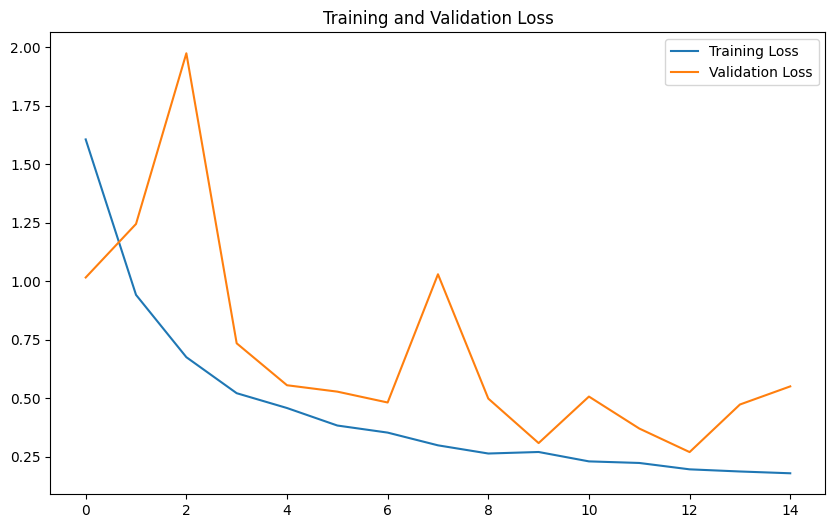

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

From the training and validation loss chart that is given above there are some key insights gained.

The training loss consistently decreases over the epochs, indicating that the model is learning and improving its performance on the training data.

The validation loss is fluctuating but still decreasing. This can means that the model somewhat specialized in learning the training data and struggles to generalize to unseen data which means the model is slightly overfitting.

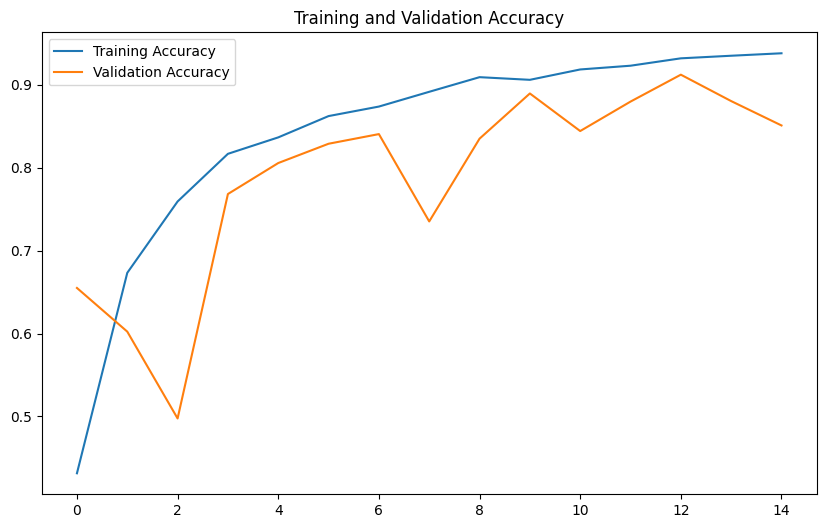

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

From the training and validation accuracy chart that is given above there are some key insights gained.

The training accuracy steadily increases throughout the epochs, indicating that the model is learning and improving its performance on the training data.

The validation accuracy fluctuates more significantly than the training accuracy but still increasing. The gap between the training and validation accuracy also quite wide. This suggests that the model might be slightly overfitting but it is still bearable, meaning it is learning the training data too well and struggling to generalize to unseen data.

In [ ]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image) # convert image to array
    img_array = tf.expand_dims(img_array, 0) # create batch

    predictions = model.predict(img_array) # predict image

    predicted_class = class_names[np.argmax(predictions[0])] # get predicted class name from the index
    confidence = round(100 * np.max(predictions[0]), 2) # get confidence percentage
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


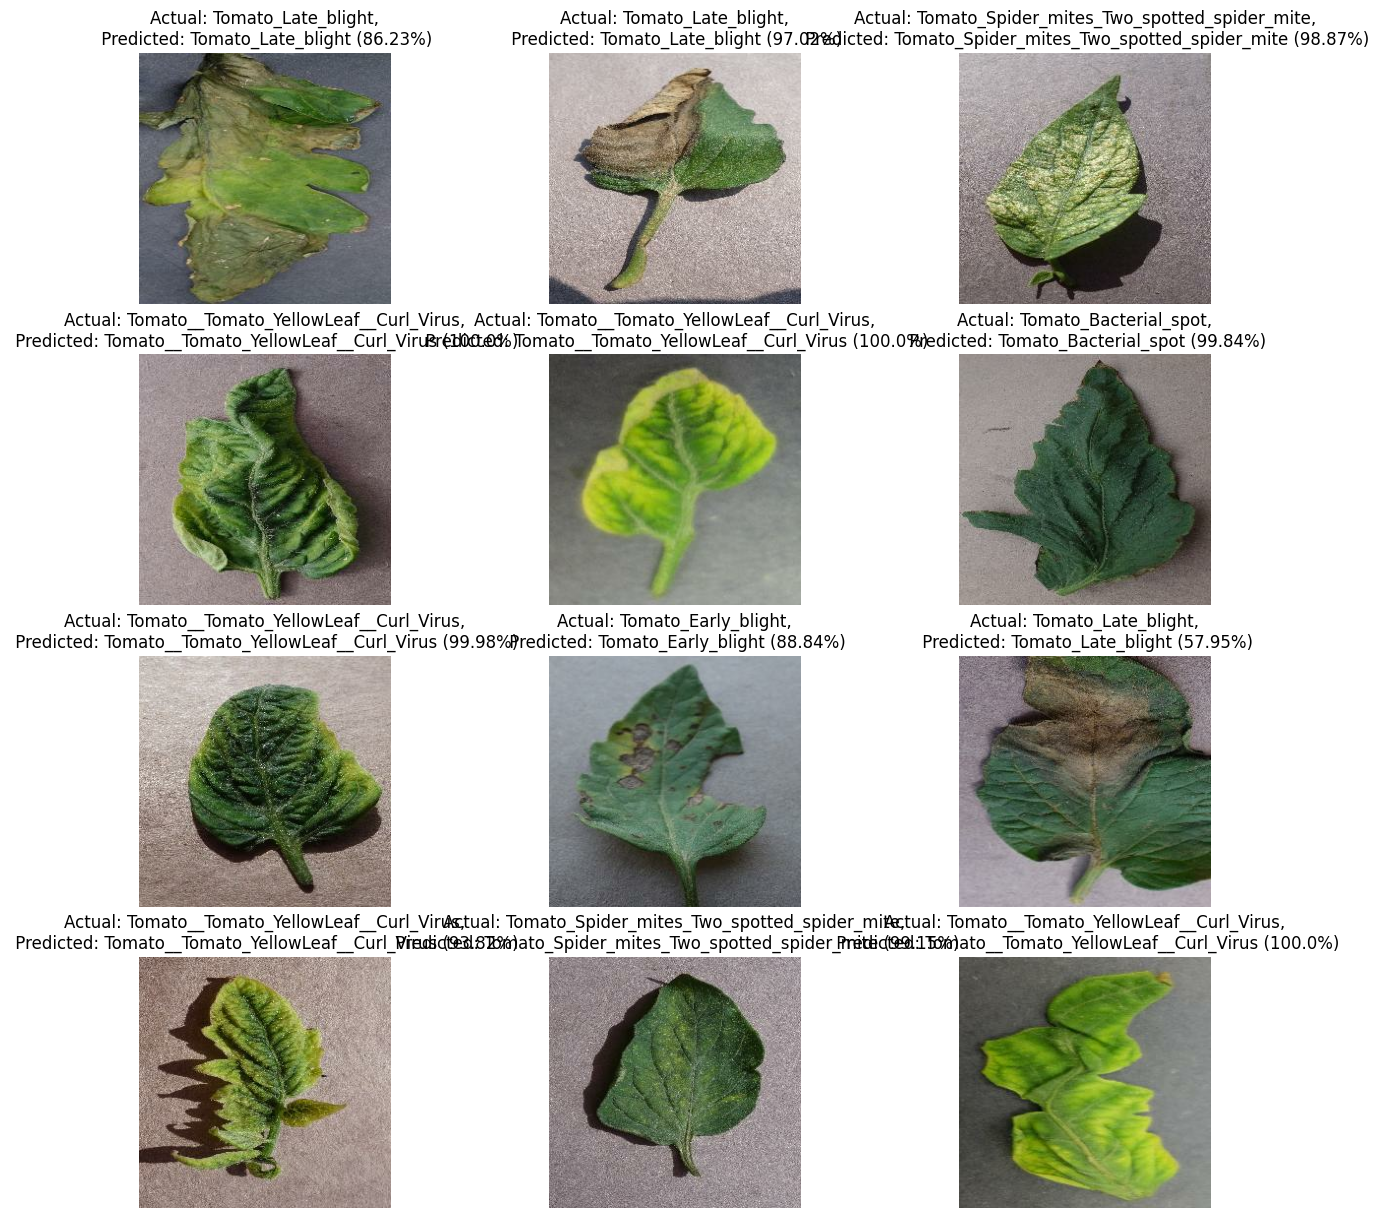

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(12): # display 12 image
        ax = plt.subplot(4, 3, i + 1) # create subplot 4 rows, 3 columns

        # convert to array (normalize)
        img_to_show = images[i].numpy()

        # Ensure correct range for display (if still in 0 - 1 range, change to 0 - 255 range for rgb)
        if img_to_show.max() <= 1.0:
            img_to_show = (img_to_show * 255).astype('uint8')

        # Display the image
        plt.imshow(img_to_show)

        # Predict class
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[labels[i]] # actual class

        # display actual class, predicted class and confidence percentage
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class} ({confidence}%)")
        plt.axis('off')

plt.show()

After displaying the actual and predicted label with the 12 images from the test data above. It can be said that the model can predict the classes accurately but not all images have the perfect confidence percentage. The lowest confidence percentage obtained is in 57.95% (Tomato_Late_blight) and the highest confidence percentage obtained is in 100% (Tomato_YellowLeaf_Curl_Virus).

# Model Saving

In [ ]:
model_save_path = '/content/drive/My Drive/my_models'

In [ ]:
model.save(model_save_path + '/tomato.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving model for model deployment. The model later will be deployed in a simple local web app format for real-world image classification tasks.

In [ ]:
import keras
import tensorflow as tf

print("Keras version:", keras.__version__)
print("TensorFlow version:", tf.__version__)


Keras version: 2.15.0
TensorFlow version: 2.15.0


# Conclusion

The Convolutional Neural Network (CNN) model achieved a training accuracy of 93.82%, a validation accuracy of 85.11%, and a testing accuracy of 86.38%. Even though the model achieved a higher accuracy in training data, it indicates that the model's performance has degraded slightly when tested on completely unseen data. While the model is still performing well overall, the lower validation and test accuracy compared to the training accuracy highlights the potential for overfitting. This means that it's learning the training data too well and slightly struggling to generalize to new, unseen data.

The developed CNN model, despite its slight overfitting tendencies, has significant potential to positively impact tomato farmers. By accurately predicting tomato plant diseases based on images, farmers can take actions to mitigate the spread of diseases and improve crop yields. Finally, farmers can produce high quality tomatoes which can command higher prices in the market and prevent significant crop losses with an early detection and treatment of the diseases.